In [245]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [292]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel,RFECV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [247]:
train.groupby('oem')['listed_price'].agg([np.mean])

,mean
oem,
audi,2.021626e+06
bmw,2.642810e+06
chevrolet,1.917756e+05
datsun,2.861576e+05
fiat,2.361982e+05
force,5.703524e+05
ford,5.973613e+05
honda,5.519711e+05
hyundai,5.507323e+05


In [248]:
train.columns

Index(['myear', 'transmission', 'fuel', 'km', 'oem', 'model', 'variant',
       'Valve Configuration', 'Turbo Charger', 'Kerb Weight', 'Drive Type',
       'Seats', 'Top Speed', 'Acceleration', 'Doors', 'Cargo Volume',
       'owner_type', 'Fuel Supply System', 'Max Torque Delivered', 'body',
       'Gear Box', 'Steering Type', 'Front Brake Type', 'Rear Brake Type',
       'Tyre Type', 'exterior_color', 'listed_price', 'avg_measure',
       'Features', 'Valves', 'Tread'],
      dtype='object')

In [249]:
train = pd.read_csv('final_train2.csv')
test = pd.read_csv('final_test2.csv')

In [250]:
df = pd.concat([train, test], axis = 0)
X = df.drop('listed_price', axis = 1)
y = df['listed_price']

In [251]:
#train_test_split
X_train = train.drop('listed_price', axis = 1)
X_test = test.drop('listed_price', axis = 1)
y_train = train['listed_price']
y_test = test['listed_price']

In [265]:
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
hgb = HistGradientBoostingRegressor()
cat = CatBoostRegressor(verbose = False)
xg = XGBRegressor()
lg = LGBMRegressor()

In [293]:
le = LabelEncoder()

In [295]:
temp_train = pd.DataFrame(le.fit_transform(X_train[cat_cols])
temp_test = pd.DataFrame(le.transform(X_test[cat_cols])
temp = pd.concat([temp_train, temp_test], axis = 1)

SyntaxError: invalid syntax (707217535.py, line 2)

In [290]:
temp_train.shape

(33760, 64)

In [291]:
temp_test.shape

(3774, 57)

## 1. Predictions and evaluations

In [282]:
num_cols = [col for col in X_train.columns if X_train[col].dtype != 'O']
cat_cols = [col for col in X_train.columns if X_train[col].dtype == 'O' and col not in nope]
nope = ['oem', 'variant', 'model']

In [260]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rX_train = pd.DataFrame(rs.fit_transform(X_train[num_cols]))
rX_test = pd.DataFrame(rs.transform(X_test[num_cols]))
rX_train.columns = num_cols
rX_test.columns = num_cols
rX = pd.concat([rX_train, rX_test], axis = 0)

In [261]:
def evaluate(model, X, X_train, X_test):
    model.fit(X_train, y_train)
    testpreds = model.predict(X_test)
    trainpreds = model.predict(X_train)
    scoretest = mean_absolute_error(y_test, testpreds)
    scoretrain = mean_absolute_error(y_train, trainpreds)
    score_percenttest = scoretest * 100 / y_test.mean()
    score_percenttrain =  scoretrain * 100 / y_train.mean()
    
    print(f"for {model}")
    print("For train")
    print("MAE: ", scoretrain)
    print("MAE percent: ", score_percenttrain)
    print("=================================")
    print("For test")
    print("MAE: ", scoretest)
    print("MAE percent: ", score_percenttest)
    print("==================================")
    
    arr = cross_val_score(estimator = model,
                    X = X,
                    y = y,
                    cv = 5,
                    n_jobs = -1,
                   scoring = 'neg_mean_absolute_error')
    values = []
    percentages = []
    for i,val in enumerate(arr):
        value = -1 * val
        percent =  value * 100 / y.mean()
        values.append(value)
        percentages.append(percent)
        print(f"for fold {i + 1}")
        print("MAE: ", value)
        print("MAE percent: ", percent)
        print("============================")
    print("CV Summary: ")
    print("MAE: ", np.mean(values), ' ± ', np.std(values))
    print("MAE percent: ", np.mean(percentages), ' ± ', np.std(percentages))
    
    

In [191]:
a = [2, 3, 5, 6]
for i, val in enumerate(a):
    print(f'{i} : {val}')
np.mean(a)

0 : 2
1 : 3
2 : 5
3 : 6


4.0

In [192]:
%%time
evaluate(rf, X[num_cols], X_train[num_cols], X_test[num_cols])

for RandomForestRegressor()
For train
MAE:  37242.735578312015
MAE percent:  4.822322795897742
For test
MAE:  102752.18512380133
MAE percent:  12.98342647695737
for fold 1
MAE:  100226.837675376
MAE percent:  12.945518464902444
for fold 2
MAE:  102269.78237244285
MAE percent:  13.209389688539293
for fold 3
MAE:  97468.32767955624
MAE percent:  12.589223255807205
for fold 4
MAE:  102252.27498692332
MAE percent:  13.20712839617717
for fold 5
MAE:  100901.91648835852
MAE percent:  13.032713126945312
CV Summary: 
MAE:  100623.82784053139  ±  1763.6962427190517
MAE percent:  12.996794586474286  ±  0.2278028800085345
Wall time: 43.8 s


In [193]:
%%time
evaluate(et, X[num_cols], X_train[num_cols], X_test[num_cols])

for ExtraTreesRegressor()
For train
MAE:  574.2409952606636
MAE percent:  0.07435478083938363
For test
MAE:  101847.32625022081
MAE percent:  12.869091500596525
for fold 1
MAE:  103303.44426601838
MAE percent:  13.342899728765135
for fold 2
MAE:  104766.94920674036
MAE percent:  13.531929240949845
for fold 3
MAE:  101407.57341081658
MAE percent:  13.098024885536242
for fold 4
MAE:  106100.54781959059
MAE percent:  13.704179766535988
for fold 5
MAE:  104523.53491162625
MAE percent:  13.500489316024472
CV Summary: 
MAE:  104020.40992295844  ±  1579.7711048041085
MAE percent:  13.435504587562338  ±  0.2040467052726868
Wall time: 28 s


In [268]:
%%time
evaluate(hgb, X[num_cols], X_train[num_cols], X_test[num_cols])

for HistGradientBoostingRegressor()
For train
MAE:  97118.78651630798
MAE percent:  12.575288330867158
For test
MAE:  112608.08616082298
MAE percent:  14.228785554471502
for fold 1
MAE:  106486.24456949692
MAE percent:  13.753997205792501
for fold 2
MAE:  105563.52295354895
MAE percent:  13.634816455463852
for fold 3
MAE:  106222.75741356896
MAE percent:  13.719964626081886
for fold 4
MAE:  111066.56144202055
MAE percent:  14.345600992000021
for fold 5
MAE:  108903.19177400338
MAE percent:  14.066175414646832
CV Summary: 
MAE:  107648.45563052777  ±  2048.8096227839633
MAE percent:  13.904110938797018  ±  0.26462875032258776
Wall time: 3.61 s


In [262]:
%%time
evaluate(cat, X[num_cols], X_train[num_cols], X_test[num_cols])

for <catboost.core.CatBoostRegressor object at 0x00000259E9B167C0>
For train
MAE:  82131.45310054386
MAE percent:  10.634674719694962
For test
MAE:  97890.36360292509
MAE percent:  12.369102779759773
for fold 1
MAE:  96511.84952495171
MAE percent:  12.465682436812067
for fold 2
MAE:  96738.7232086519
MAE percent:  12.494985940041952
for fold 3
MAE:  94805.32822232165
MAE percent:  12.245264397628791
for fold 4
MAE:  97828.27436478926
MAE percent:  12.635714760160129
for fold 5
MAE:  97583.64236362594
MAE percent:  12.60411755364721
CV Summary: 
MAE:  96693.5635368681  ±  1065.8612444429007
MAE percent:  12.48915301765803  ±  0.13766897909769604
Wall time: 28.9 s


In [270]:
%%time
evaluate(xg, rX[num_cols], rX_train[num_cols], rX_test[num_cols])

for XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)
For train
MAE:  75787.64678443078
MAE percent:  9.813255956118232
For test
MAE:  101774.35136998212
MAE percent:  12.859870635939464
for fold 1
MAE:  98063.98895614094
MAE percent:  12.666160174438023
for fold 2
MAE:  98232.78158822599
MAE percent:  12.68

### Adding encoded columns

In [287]:
nX = pd.concat([X[num_cols], temp], axis = 1)
nX_train = pd.concat([X_train[num_cols], temp_train], axis = 1)
nX_test = pd.concat([X_test[num_cols], temp_test], axis = 1)

In [288]:
%%time
evaluate(cat, nX, nX_train, nX_test)

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/data/model_dataset_compatibility.cpp:81: At position 20 should be feature with name Valve Configuration_dohc (found Valve Configuration_idsi).

### Error Analysis

In [189]:
cat_preds = pd.Series(cat.predict(X_test[num_cols]), name = 'predictions')
cat_residuals = pd.Series(np.abs(y_test - cat_preds), name = 'residuals')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


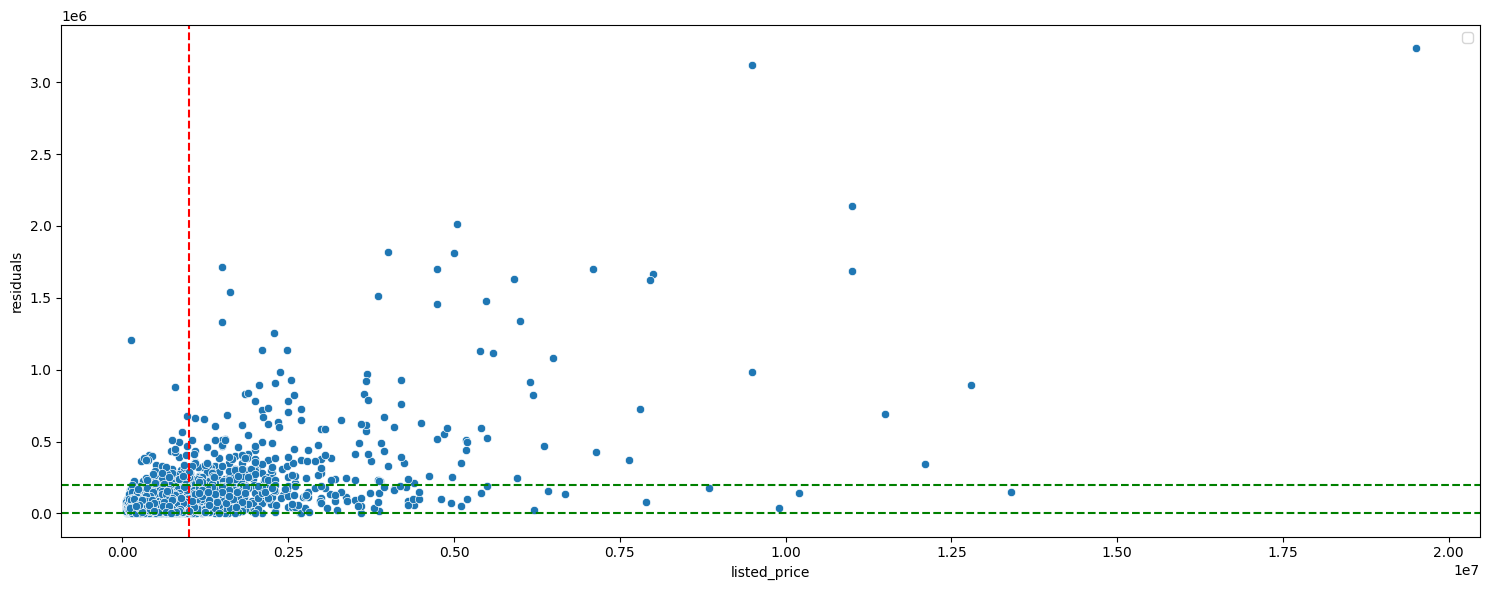

In [144]:
plt.figure(figsize = (15, 6))
sns.scatterplot(x = y_test, y = cat_residuals)
plt.axvline(x = 1000000, color = 'r', linestyle = '--')
plt.axhline(y = 200000, color = 'g', linestyle = '--')
plt.axhline(y = 0, color = 'g', linestyle = '--')
plt.yticks()
plt.tight_layout()
plt.legend()

In [198]:
errors = pd.concat([y_test, cat_preds, cat_residuals, X_test['oem']], axis = 1)
game = errors.loc[errors.residuals > 150000]

<Axes: xlabel='residuals', ylabel='Count'>

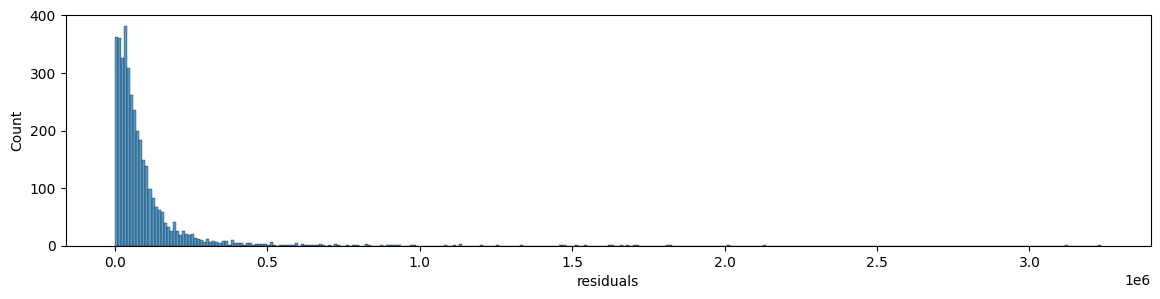

In [231]:
plt.figure(figsize = (14, 3))
sns.histplot(errors.residuals, fill = True)

In [143]:
errors.groupby('oem')['residuals'].agg([np.mean])

,mean
oem,
audi,2.750409e+05
bmw,4.093437e+05
chevrolet,4.489312e+04
datsun,4.808099e+04
fiat,4.171439e+04
ford,7.331256e+04
honda,6.326644e+04
hyundai,6.332960e+04
isuzu,6.568604e+04


In [208]:
mean_errors = errors.loc[errors.listed_price < 2000000].groupby('oem')['residuals'].agg([np.mean, max, min])

In [212]:
less_than_10l = errors.loc[errors.listed_price < 2000000]
counts = less_than_10l.oem.value_counts()

In [210]:
pd.concat([mean_errors, counts], axis = 1)

,mean,max,min,oem
audi,2.138273e+05,5.108954e+05,1.461933e+04,28
bmw,2.453293e+05,1.717239e+06,1.580588e+02,27
chevrolet,4.489312e+04,2.416497e+05,4.295486e+02,93
datsun,4.808099e+04,1.325812e+05,3.669611e+02,47
fiat,4.171439e+04,9.962768e+04,3.312697e+03,20
ford,6.219472e+04,2.092850e+05,1.654592e+03,106
honda,6.276095e+04,5.132928e+05,7.773015e+01,390
hyundai,6.222251e+04,1.207814e+06,1.594018e+01,732
isuzu,6.568604e+04,6.977165e+04,6.160043e+04,2
jaguar,2.141860e+05,2.369526e+05,1.914194e+05,2
